## Introduction

This project explores the development of predictive models to estimate the ultimate tensile strength of 3D printed objects based on key parameters such as infill density, layer height, and extrusion temperature. By utilizing data collected from tensile tests, eight machine learning algorithms—including Linear Regression, Support Vector Regression, Random Forest, and XGBoost—are evaluated for their ability to accurately predict tensile strength.

After optimizing the models' hyperparameters, their performance is assessed using metrics like R-squared, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). The XGBoost model is found to be the most effective, providing manufacturers with valuable insights to improve 3D printing processes by optimizing tensile strength and reducing material waste.


### Dataset Description

The dataset used in this project is self-generated through an experimental process involving 3D printing and tensile strength testing. A total of 125 specimens were 3D printed using **PLA (Polylactic Acid)** filament, each with varying key parameters such as **infill density**, **layer height**, and **extrusion temperature**. After printing, the tensile strength of each specimen was tested using a **Universal Testing Machine (UTM)**.

The dataset includes the following columns:
- **Infill Density (%):** The percentage of the object’s volume that is solid.
- **Layer Height (mm):** The thickness of each individual layer in the 3D printing process.
- **Extrusion Temperature (°C):** The temperature at which the filament is extruded during printing.
- **Ultimate Tensile Strength (MPa):** The maximum stress the material can withstand while being stretched or pulled before breaking, measured during tensile testing.

This self-generated dataset is used to develop and evaluate machine learning models aimed at predicting tensile strength based on these input parameters, with the goal of optimizing 3D printing processes.


#Importing Libraries and Installing Dependencies
NumPy: Used for numerical computations and handling arrays.
Matplotlib: A plotting library used to create static, interactive, and animated visualizations.

#####Pandas: A data manipulation and analysis library that provides data structures for efficiently managing structured data.
Seaborn: A visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
Additionally, we install the Permetrics library, which is used to evaluate machine learning models by providing a variety of performance metrics.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install permetrics

#Cloning the Project Data

In [ ]:
!git clone https://github.com/rehbar01/project_data.git

Cloning into 'project_data'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 12.00 KiB | 12.00 MiB/s, done.


# Loading Data from Excel and Converting to CSV

In [ ]:
import pandas as pd
data = '/content/project_data/our_data.xlsx'
# Read the Excel file
df = pd.read_excel(data)
df.to_csv('data.csv', index=False)
dataset = pd.read_csv('data.csv')
dataset

,Infill Density,Layer Height,Extrusion Temperature(°C),Tensile Strength(Mpa)
0,10,0.1,190,20.1
1,10,0.1,200,22.2
2,10,0.1,210,24.5
3,10,0.1,220,26.7
4,10,0.1,230,25.7
...,...,...,...,...
120,100,0.3,190,32.4
121,100,0.3,200,33.5
122,100,0.3,210,34.7
123,100,0.3,220,35.8


# Correlation Heatmap Visualization
- The correlation matrix of the dataset and visualization of it using a heatmap. This helps us understand the relationships between different variables in the dataset.

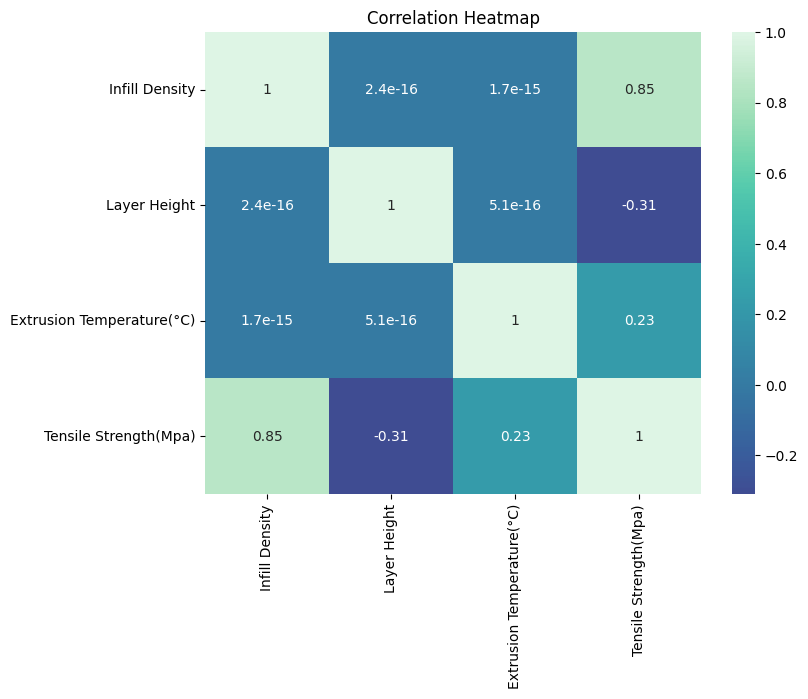

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako',center=0)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing Function
This function handles data preprocessing by performing the following tasks :
Handling missing values,
Splitting the dataset into features and target variable,
Dividing the data into training and testing sets,
Scaling the features for standardization.
The function returns the processed training and testing sets.

In [ ]:
def data_preprocessing(dataset):

  # Handle missing values
  dataset = dataset.dropna()

  # Split the dataset into features (X) and target variable (y)
  X = dataset.iloc[:, :-1].values
  y = dataset.iloc[:, -1].values

  # Split the dataset into training and testing sets
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

  # Scale the features
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Print the shapes of the resulting sets
  print("X_train.shape: ",X_train.shape)
  print("X_test.shape: ",X_test.shape)
  print("y_train.shape: ",y_train.shape)
  print("y_test.shape: ",y_test.shape)

  return X_train, X_test, y_train, y_test


### Performance Metrics Calculation

This function calculates and prints several performance metrics for both the training and testing sets, including:
- Mean Absolute Error (MAE),
- Root Mean Squared Error (RMSE),
- R-squared score,
- a10 score (using the Permetrics library).

These metrics help evaluate the accuracy and performance of the model.


In [ ]:
def performance_metrics(y_test,y_train, y_pred_test,y_pred_train):
  from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
  from permetrics.regression import RegressionMetric
  # Calculate the mean absolute error
  mae_test = mean_absolute_error(y_test, y_pred_test)
  mae_train = mean_absolute_error(y_train, y_pred_train)

  # Calculate the root mean squared error
  rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
  rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

  # Calculate the R-squared score
  r2_test = r2_score(y_test, y_pred_test)
  r2_train = r2_score(y_train, y_pred_train)


  # Calculate the a10 score
  a10_test = RegressionMetric(y_test, y_pred_test, a10=True)
  a10_train = RegressionMetric(y_train, y_pred_train, a10=True)


  # Print the mean absolute error
  print("Mean absolute error test:", mae_test)
  print("Mean absolute error train:", mae_train)
  print("\n")


  # Print the Root mean squared error
  print("Root mean squared error test:", rmse_test)
  print("Root mean squared error train:", rmse_train)
  print("\n")

  # Print the R-squared score
  print("R-squared score test:", r2_test)
  print("R-squared score train:", r2_train)
  print("\n")

  # Print the a10 score
  print("a10 score test:", a10_test.a10_index())
  print("a10 score train:", a10_train.a10_index())
  print("\n")

# Visualizing Prediction Results
- This function creates a scatter plot comparing the actual vs. predicted tensile strength for both the training and testing datasets. It provides a visual representation of the model's performance by plotting actual values against predicted values.



In [ ]:
def visualize_results(y_test, y_pred, y_train, y_pred_train):
  plt.figure(figsize=(8, 6))
  x = np.linspace(10, 40, 100)
  plt.plot(x, x, '--', color='gray')
  plt.scatter(y_test, y_pred, color='blue', label='Testing dataset', marker='o')
  plt.scatter(y_train, y_pred_train, color='red', label='Training dataset', marker='o')
  plt.xlabel('Actual Tensile Strength (MPa)', fontsize=16)
  plt.ylabel('Predicted Tensile Strength (MPa)', fontsize=16)
  # Increase the font size of the tick labels
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.legend(fontsize=16)
  plt.show()

# Model 1 :
### Linear Regression Model Training and Evaluation
- Create a Linear Regression model.
- Preprocess the dataset to obtain training and testing sets.
- Train the model on the training data.
- Make predictions on both the training and testing sets.
- Evaluate the model using performance metrics.
- Visualize the results by comparing actual vs. predicted values.


X_train.shape:  (100, 3)
X_test.shape:  (25, 3)
y_train.shape:  (100,)
y_test.shape:  (25,)
Mean absolute error test: 1.6010747543273374
Mean absolute error train: 1.4144612165243797


Root mean squared error test: 1.8896352238453027
Root mean squared error train: 1.7845573007096802


R-squared score test: 0.8748054343802737
R-squared score train: 0.8727067721629053


a10 score test: 0.8
a10 score train: 0.81




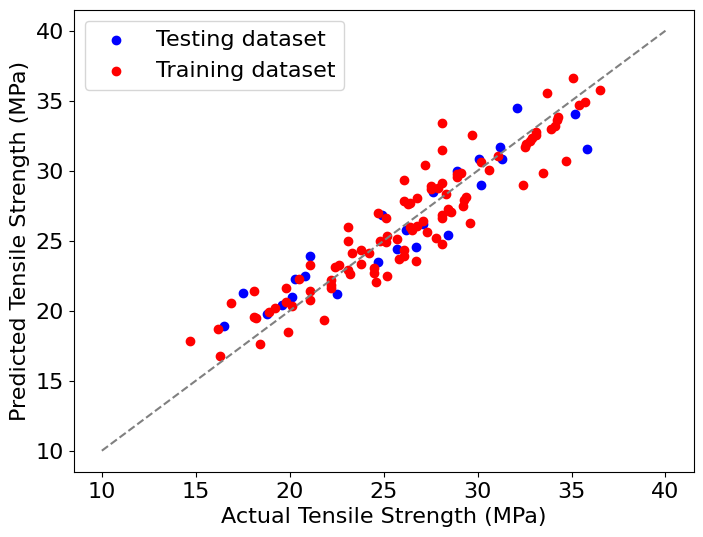

In [ ]:
from sklearn.linear_model import LinearRegression

# Creating the model object
regressor = LinearRegression()
X_train, X_test, y_train, y_test = data_preprocessing(dataset)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
performance_metrics(y_test,y_train, y_pred,y_pred_train)
visualize_results(y_test, y_pred, y_train, y_pred_train)

### Finding the Optimal Degree for Polynomial Regression

This function determines the optimal degree for polynomial regression by performing the following steps:
- Splits the dataset into features (X) and target variable (y).
- For each degree from 1 to the specified maximum degree (`max_degree`):
  - Transforms the input data using polynomial features.
  - Trains a linear regression model on the transformed data.
  - Evaluates the model using Mean Absolute Error (MAE) on both the training and testing sets.
  - Performs cross-validation and calculates the average cross-validation score for each degree.
- The degree with the highest cross-validation score is selected as the optimal degree for polynomial regression.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def find_optimal_degree(dataset, max_degree):
  """
  Finds the optimal degree for polynomial regression using cross-validation.

  Args:
    X: The input data.
    y: The target variable.
    max_degree: The maximum degree to consider.

  Returns:
    The optimal degree for polynomial regression.
  """
  # Split the dataset into features (X) and target variable (y)
  X = dataset.iloc[:, :-1].values
  y = dataset.iloc[:, -1].values

  # Initialize a list to store the cross-validation scores.
  scores = []

  # Loop through each degree from 1 to max_degree.
  for degree in range(1, max_degree + 1):
    # Create a polynomial features object.
    poly_features = PolynomialFeatures(degree=degree)

    # Transform the input data.
    X_poly = poly_features.fit_transform(X)

    X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)

    # Create a linear regression object.
    linear_regression = LinearRegression()
    linear_regression.fit(X_train_poly, y_train)
    y_pred = linear_regression.predict(X_test_poly)
    y_pred_train = linear_regression.predict(X_train_poly)

    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    print(f"Degree {degree}: mae_test->{mae_test}")
    print(f"Degree {degree}: mae_train->{mae_train}")

    # Perform cross-validation.
    cv_scores = cross_val_score(linear_regression, X_poly, y, cv=10)

    # Append the average cross-validation score to the list.
    scores.append(np.mean(cv_scores))
    print(f"Degree {degree}: cv_score->{np.mean(cv_scores)}")
    print("\n")

  # Find the degree with the highest cross-validation score.
  optimal_degree = np.argmax(scores) + 1

  # Return the optimal degree.
  return optimal_degree

# Model 2:
### Training Polynomial Regression Model with Optimal Degree
- Use the previously defined function to find the optimal degree for polynomial regression.
- Split the dataset into features and target variable.
- Create polynomial features based on the optimal degree and transform the input data.
- Train a linear regression model using the transformed polynomial features.
- Make predictions on both the training and testing sets.
- Evaluate the model using performance metrics.
- Visualize the results by comparing actual vs. predicted values.


Degree 1: mae_test->1.6010747543273354
Degree 1: mae_train->1.414461216524379
Degree 1: cv_score->0.22548037380117023


Degree 2: mae_test->1.2029602255471281
Degree 2: mae_train->0.8939014397645603
Degree 2: cv_score->0.492618842193078


Degree 3: mae_test->0.7112305235409474
Degree 3: mae_train->0.5438925481350898
Degree 3: cv_score->0.42319352874876026


Degree 4: mae_test->0.5496971256059479
Degree 4: mae_train->0.2969712915131241
Degree 4: cv_score->-2.7799278957748266


Degree 5: mae_test->0.45619198353090923
Degree 5: mae_train->0.2652088720042813
Degree 5: cv_score->-2.8436469265908104


Degree 6: mae_test->0.30241204832514457
Degree 6: mae_train->0.18229118575854408
Degree 6: cv_score->-9.180780941152697


Degree 7: mae_test->0.5652824079241182
Degree 7: mae_train->0.2560310443217496
Degree 7: cv_score->-29.071129744618638


Degree 8: mae_test->0.5810717539752165
Degree 8: mae_train->0.15134375974791553
Degree 8: cv_score->-10.57478996052812


Degree 9: mae_test->0.57058428496

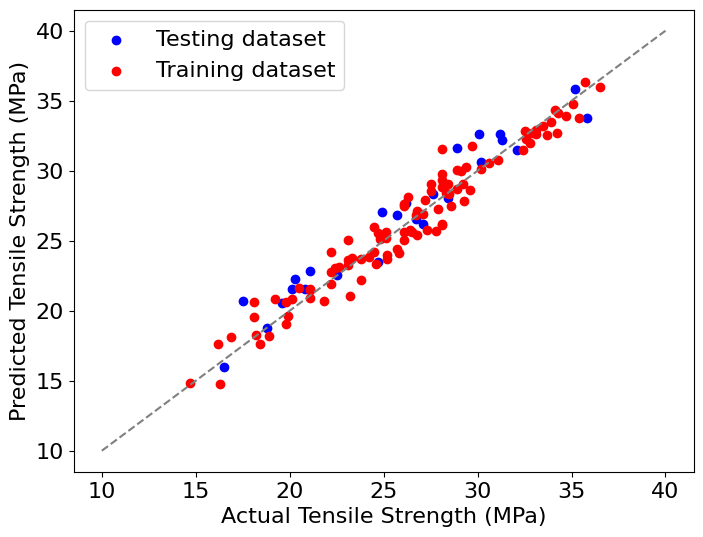

In [ ]:
# Find the optimal degree for polynomial regression.
optimal_degree = find_optimal_degree(dataset, 10)

# Print the optimal degree.
print("Optimal degree:", optimal_degree)

# Split the dataset into features (X) and target variable (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Create a polynomial features object.
poly_features = PolynomialFeatures(degree=optimal_degree)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)

# Create a linear regression object.
linear_regression = LinearRegression()
linear_regression.fit(X_train_poly, y_train)
y_pred = linear_regression.predict(X_test_poly)
y_pred_train = linear_regression.predict(X_train_poly)
performance_metrics(y_test,y_train, y_pred,y_pred_train)
visualize_results(y_test, y_pred, y_train, y_pred_train)


# Model 3 :
### Support Vector Regression (SVR) with Hyperparameter Tuning
- Define a grid of hyperparameters for the Support Vector Regression (SVR) model, including different kernels, regularization values (C), and gamma values.
- Preprocess the dataset to obtain training and testing sets.
- Perform grid search cross-validation to find the best combination of hyperparameters.
- Train the SVR model using the best hyperparameters.
- Predict the target values for both the training and testing sets using the optimized model.
- Evaluate the model using performance metrics.
- Visualize the results by comparing actual vs. predicted values.


X_train.shape:  (100, 3)
X_test.shape:  (25, 3)
y_train.shape:  (100,)
y_test.shape:  (25,)
Best hyperparameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
All parameters of the best model: {'C': 1000, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Mean absolute error test: 0.5419847627493033
Mean absolute error train: 0.30593479940321766


Root mean squared error test: 0.6721176768304696
Root mean squared error train: 0.48859441035831763


R-squared score test: 0.9841612770888758
R-squared score train: 0.9904579586774325


a20 score test: 1.0
a20 score train: 1.0


a10 score test: 1.0
a10 score train: 1.0




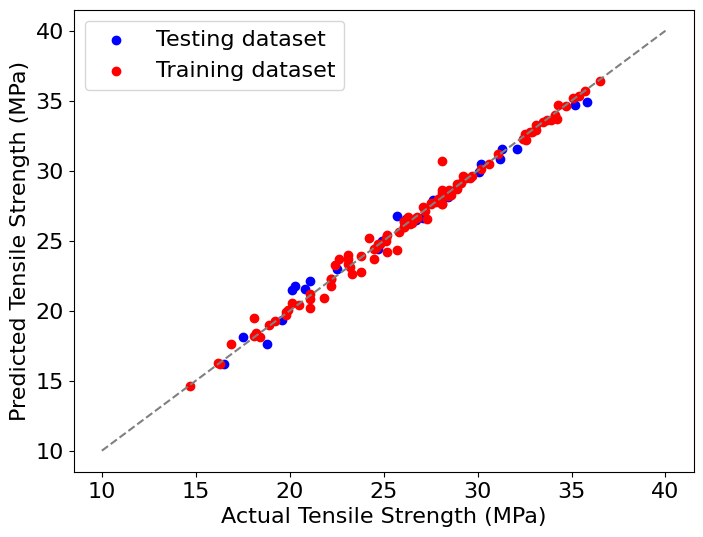

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [10, 100, 1000],
    'gamma': [0.1, 0.01, 0.001]
}

X_train, X_test, y_train, y_test = data_preprocessing(dataset)

# Create the SVR model
svm_regressor = SVR()

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_regressor, param_grid, cv=5)

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict using the best model
best_model = grid_search.best_estimator_
print("All parameters of the best model:", best_model.get_params())
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
performance_metrics(y_test,y_train, y_pred,y_pred_train)
visualize_results(y_test, y_pred, y_train, y_pred_train)


# Model 4 :
### Decision Tree Regressor Model
- Create a Decision Tree Regressor model.
- Preprocess the dataset to obtain training and testing sets.
- Train the Decision Tree model on the training data.
- Predict the target values for both the training and testing sets.
- Print the model parameters.
- Evaluate the model using performance metrics.
- Visualize the results by comparing actual vs. predicted values.


X_train.shape:  (100, 3)
X_test.shape:  (25, 3)
y_train.shape:  (100,)
y_test.shape:  (25,)
All parameters of the best model: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Mean absolute error test: 1.5479999999999996
Mean absolute error train: 0.0


Root mean squared error test: 1.7323971830963012
Root mean squared error train: 0.0


R-squared score test: 0.8947736602890408
R-squared score train: 1.0


a20 score test: 1.0
a20 score train: 1.0


a10 score test: 0.84
a10 score train: 1.0




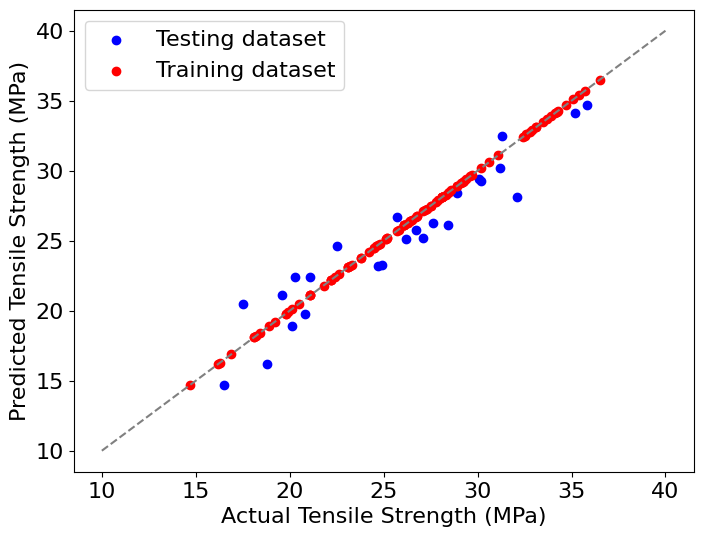

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#Create the decision tree model
regressor_t = DecisionTreeRegressor(random_state = 42)


X_train, X_test, y_train, y_test = data_preprocessing(dataset)
regressor_t.fit(X_train, y_train)
print("All parameters of the best model:", regressor_t.get_params())


y_pred_test = regressor_t.predict(X_test)
y_pred_train_ = regressor_t.predict(X_train)
performance_metrics(y_test,y_train, y_pred_test,y_pred_train_)
visualize_results(y_test, y_pred_test, y_train, y_pred_train_)


# Model 5 :
### Hyperparameter Tuning and Model Evaluation for XGBoost Regressor

- Perform a grid search to find the optimal hyperparameters for the XGBoost Regressor, evaluating different combinations of learning rate, number of estimators, and max depth.
- Train the XGBoost model using the best parameters identified through cross-validation.
- Generate predictions for both the training and testing sets.
- Assess model performance by calculating key metrics, such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared.
- Visualize the results to compare the actual values against the predicted values.





X_train.shape:  (100, 3)
X_test.shape:  (25, 3)
y_train.shape:  (100,)
y_test.shape:  (25,)
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100} 

All parameters of the best model: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'sub

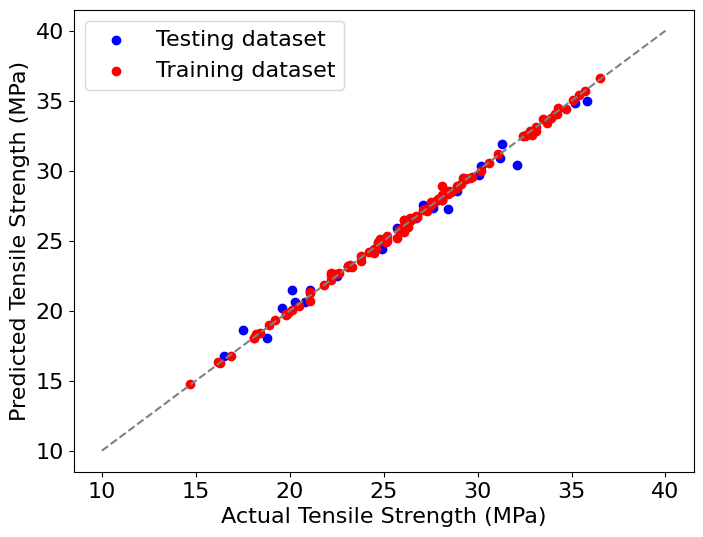

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [30, 50, 100],
    'max_depth': [4, 8, 16]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5)


X_train, X_test, y_train, y_test = data_preprocessing(dataset)
# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params,"\n")

# Create an XGBRegressor object with the best hyperparameters
xgb = XGBRegressor(**best_params)

# Fit the model to the training data
xgb.fit(X_train, y_train)
print("All parameters of the best model:", xgb.get_params())
# Predict the test data
y_pred_test = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

# Evaluate the model using appropriate metrics
performance_metrics(y_test,y_train, y_pred_test,y_pred_train)
visualize_results(y_test, y_pred_test, y_train, y_pred_train)


# Model 6 :
### AdaBoost Regressor with Grid Search for Hyperparameter Tuning

- A grid search is performed to explore combinations of hyperparameters, specifically the learning rate and the number of estimators for the AdaBoost Regressor.
- GridSearchCV is applied for 5-fold cross-validation to identify the best set of hyperparameters.
- The AdaBoost model is trained using the optimal hyperparameters.
- Predictions are generated for both training and test datasets.
- Model performance is assessed through Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared score.
- The results are visualized by plotting the actual versus predicted values for further analysis.


X_train.shape:  (100, 3)
X_test.shape:  (25, 3)
y_train.shape:  (100,)
y_test.shape:  (25,)
{'learning_rate': 1, 'n_estimators': 50}
All parameters of the best model: {'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1, 'loss': 'linear', 'n_estimators': 50, 'random_state': None}
Mean absolute error test: 1.5902260081857191
Mean absolute error train: 1.02676415042423


Root mean squared error test: 1.8747266895997312
Root mean squared error train: 1.222031175284649


R-squared score test: 0.8767731205991756
R-squared score train: 0.9403089971749111


a20 score test: 1.0
a20 score train: 1.0


a10 score test: 0.84
a10 score train: 0.98




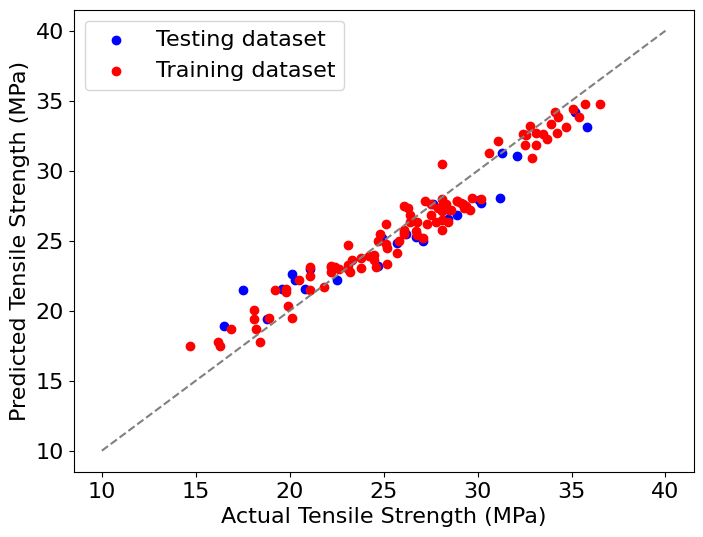

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [30, 50, 100],
}

# Create the AdaBoostRegressor model
ada_boost_regressor = AdaBoostRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(ada_boost_regressor, param_grid, cv=5)

# Fit the grid search object to the data
X_train, X_test, y_train, y_test = data_preprocessing(dataset)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params)

# Create an AdaBoostRegressor object with the best hyperparameters
ada_boost_regressor = AdaBoostRegressor(**best_params)

# Fit the model to the training data
ada_boost_regressor.fit(X_train, y_train)
print("All parameters of the best model:", ada_boost_regressor.get_params())
# Predict the test data
y_pred_test = ada_boost_regressor.predict(X_test)
y_pred_train = ada_boost_regressor.predict(X_train)

# Evaluate the model using appropriate metrics
performance_metrics(y_test, y_train, y_pred_test, y_pred_train)
visualize_results(y_test, y_pred_test, y_train, y_pred_train)


# Model 7 :
### Random Forest Regressor with Hyperparameter Tuning

This section focuses on tuning the Random Forest model's hyperparameters. A grid search is set up to explore combinations of the number of estimators, maximum depth, minimum samples required to split a node, and the minimum number of samples required at a leaf node. Cross-validation is used to select the best parameters.

Once the optimal parameters are found, the Random Forest model is trained using them. Predictions are made on both the training and test datasets, and performance is evaluated with standard metrics. The results are visualized by comparing predicted values against actual values.


X_train.shape:  (100, 3)
X_test.shape:  (25, 3)
y_train.shape:  (100,)
y_test.shape:  (25,)
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
All parameters of the best model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Mean absolute error test: 0.9654799999999909
Mean absolute error train: 0.33389555555556094


Root mean squared error test: 1.1258844207505825
Root mean squared error train: 0.42618584177374885


R-squared score test: 0.9555555899936639
R-squared score train: 0.9927399043819937


a20 score test: 1.0
a20 score train: 1.0


a10 score test: 0.96
a10 score train: 1.0




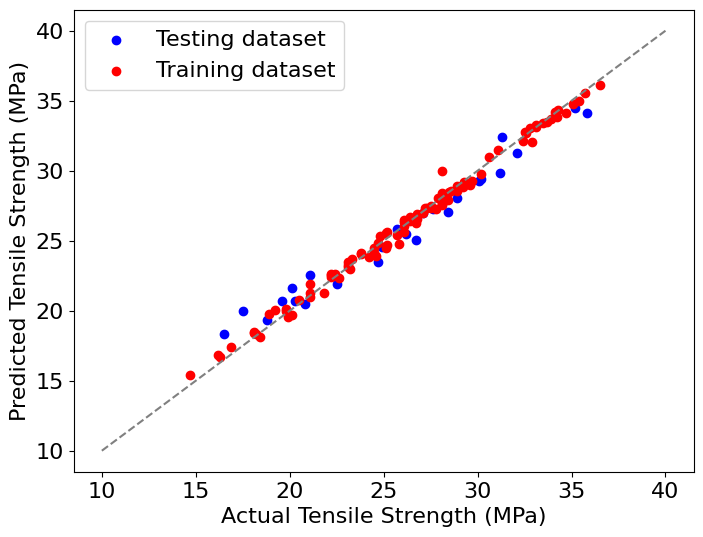

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestRegressor model
random_forest_regressor = RandomForestRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(random_forest_regressor, param_grid, cv=5)

# Fit the grid search object to the data
X_train, X_test, y_train, y_test = data_preprocessing(dataset)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params)

# Create a RandomForestRegressor object with the best hyperparameters
random_forest_regressor = RandomForestRegressor(**best_params)

# Fit the model to the training data
random_forest_regressor.fit(X_train, y_train)
print("All parameters of the best model:", random_forest_regressor.get_params())
# Predict the test data
y_pred_test = random_forest_regressor.predict(X_test)
y_pred_train = random_forest_regressor.predict(X_train)

# Evaluate the model using appropriate metrics
performance_metrics(y_test, y_train, y_pred_test, y_pred_train)
visualize_results(y_test, y_pred_test, y_train, y_pred_train)


# Model 8 :

### K-Nearest Neighbors Regressor with Hyperparameter Tuning

A grid search is used to explore different values for the number of neighbors, weights, and algorithm for K-Nearest Neighbors (KNN) regression. Cross-validation with 5 folds is applied to find the optimal hyperparameters.

Once the best hyperparameters are selected, the KNN model is trained using them. Predictions are made on both the training and test datasets, and the performance of the model is evaluated using standard metrics. The results are visualized to compare the actual versus predicted values.




X_train.shape:  (100, 3)
X_test.shape:  (25, 3)
y_train.shape:  (100,)
y_test.shape:  (25,)
{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
All parameters of the best model: {'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Mean absolute error test: 1.0893333333333333
Mean absolute error train: 0.7360000000000001


Root mean squared error test: 1.3466831682157294
Root mean squared error train: 1.014878208347079


R-squared score test: 0.9364141633434672
R-squared score train: 0.9588308254658432


a20 score test: 1.0
a20 score train: 1.0


a10 score test: 0.92
a10 score train: 0.94




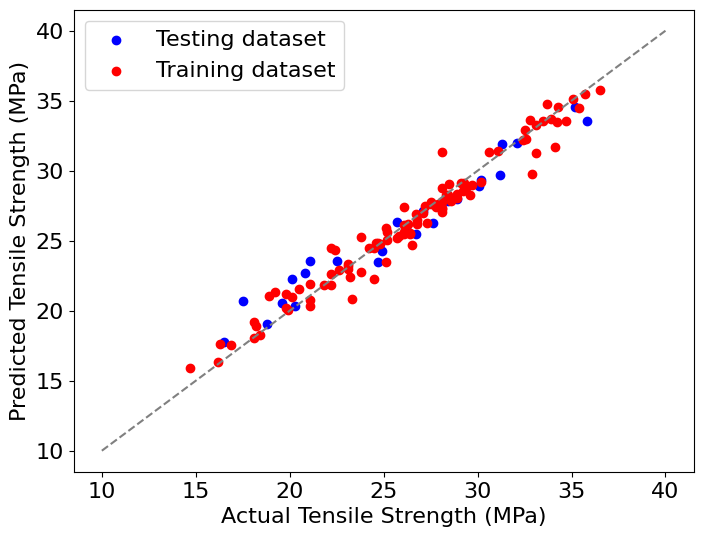

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# Create the KNeighborsRegressor model
knn_regressor = KNeighborsRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5)

# Fit the grid search object to the data
X_train, X_test, y_train, y_test = data_preprocessing(dataset)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(best_params)

# Create a KNeighborsRegressor object with the best hyperparameters
knn_regressor = KNeighborsRegressor(**best_params)

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)
print("All parameters of the best model:", knn_regressor.get_params())
# Predict the test data
y_pred_test = knn_regressor.predict(X_test)
y_pred_train = knn_regressor.predict(X_train)

# Evaluate the model using appropriate metrics
performance_metrics(y_test, y_train, y_pred_test, y_pred_train)
visualize_results(y_test, y_pred_test, y_train, y_pred_train)

In [ ]:
ml_algorithms = ['LR', 'PR', 'SVR', 'DTR', 'XGBR', 'ABR', 'RF', 'KNR']
train_rmse = [1.78, 1.11, 0.49, 0.0, 0.2, 1.17, 0.44, 1.01]
test_rmse = [1.89, 1.47, 0.67, 1.73, 0.66, 1.82, 1.13, 1.35]
test_mae = [1.6, 1.2, 0.54, 1.55, 0.5, 1.58, 0.94, 1.09]
train_mae = [1.41, 0.89, 0.31, 0.0, 0.15, 1.01, 0.35, 0.74]
test_r_sq = [0.87, 0.92, 0.98, 0.89, 0.98, 0.88, 0.96, 0.94]
train_r_sq = [0.87, 0.95, 0.99, 1.0, 1.0, 0.95, 0.99, 0.96]
test_a10 = [0.8, 0.96, 1.0, 0.84, 1.0, 0.84, 0.96, 0.92]
train_a10 = [0.81, 0.96, 1.0, 1.0, 1.0, 0.98, 1.0, 0.94]

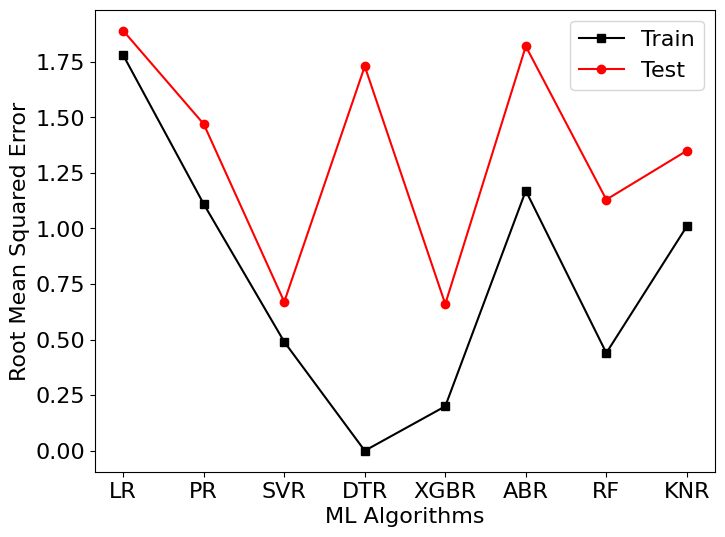

In [ ]:
# Data
ml_algorithms = ['LR', 'PR', 'SVR', 'DTR', 'XGBR', 'ABR', 'RF', 'KNR']
train_rmse = [1.78, 1.11, 0.49, 0.0, 0.2, 1.17, 0.44, 1.01]
test_rmse = [1.89, 1.47, 0.67, 1.73, 0.66, 1.82, 1.13, 1.35]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(ml_algorithms, train_rmse, marker='s', label='Train', color='black')
plt.plot(ml_algorithms, test_rmse, marker='o', label='Test', color='red')

# Labels and Title
plt.xlabel('ML Algorithms',fontsize=16)
plt.ylabel('Root Mean Squared Error',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
# Display the plot
plt.show()


### Comparison of Different Machine Learning Algorithms Using Various Performance Metrics

This section provides a visual comparison of several machine learning algorithms, including Linear Regression (LR), Polynomial Regression (PR), Support Vector Regression (SVR), Decision Tree Regressor (DTR), XGBoost Regressor (XGBR), AdaBoost Regressor (ABR), Random Forest Regressor (RF), and K-Nearest Neighbors Regressor (KNR).

The following performance metrics are used to evaluate and compare these models:

1. **Root Mean Squared Error (RMSE)**: This metric shows how well the model fits the data by measuring the average magnitude of errors between predicted and actual values. Both training and testing RMSE scores are plotted for each algorithm.
  
2. **A10 Score**: This is an advanced performance metric used to evaluate model predictions. It is plotted for both training and testing datasets across the different algorithms.
  
3. **Mean Absolute Error (MAE)**: This metric represents the average absolute difference between predicted and actual values. The MAE for both the training and testing datasets is displayed for each model.

4. **R-Squared Score (R²)**: This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. The R² score for both the training and testing datasets is visualized for all the algorithms.

These comparisons help identify the strengths and weaknesses of each algorithm across different evaluation criteria, providing insights into their performance on both training and testing datasets.


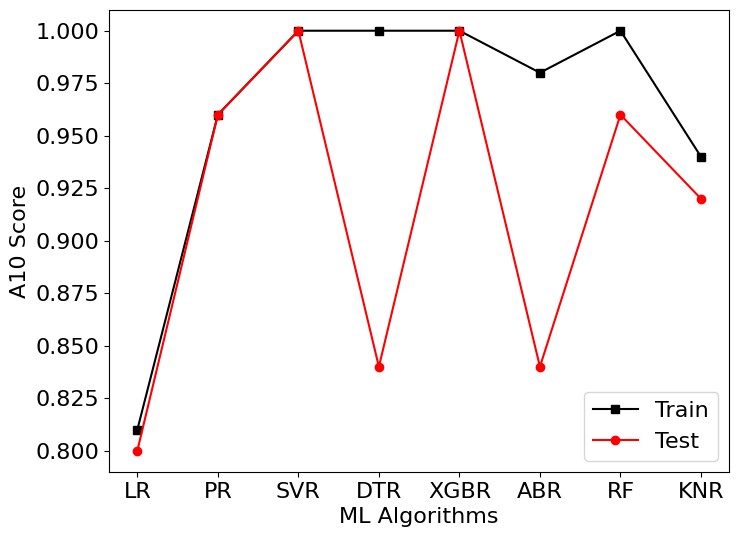

In [ ]:
# Data
ml_algorithms = ['LR', 'PR', 'SVR', 'DTR', 'XGBR', 'ABR', 'RF', 'KNR']
test_a10 = [0.8, 0.96, 1.0, 0.84, 1.0, 0.84, 0.96, 0.92]
train_a10 = [0.81, 0.96, 1.0, 1.0, 1.0, 0.98, 1.0, 0.94]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(ml_algorithms, train_a10, marker='s', label='Train', color='black')
plt.plot(ml_algorithms, test_a10, marker='o', label='Test', color='red')

# Labels and Title
plt.xlabel('ML Algorithms',fontsize=16)
plt.ylabel('A10 Score',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
# Display the plot
plt.show()


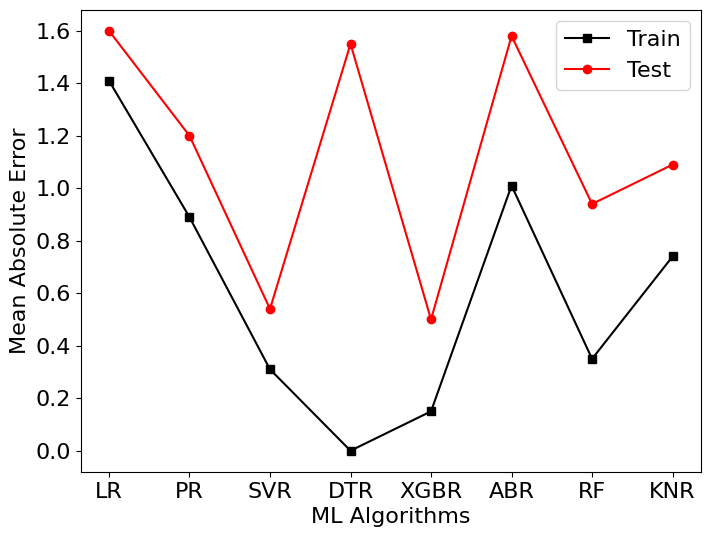

In [ ]:
# Data
ml_algorithms = ['LR', 'PR', 'SVR', 'DTR', 'XGBR', 'ABR', 'RF', 'KNR']

test_mae = [1.6, 1.2, 0.54, 1.55, 0.5, 1.58, 0.94, 1.09]
train_mae = [1.41, 0.89, 0.31, 0.0, 0.15, 1.01, 0.35, 0.74]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(ml_algorithms, train_mae, marker='s', label='Train', color='black')
plt.plot(ml_algorithms, test_mae, marker='o', label='Test', color='red')

# Labels and Title
plt.xlabel('ML Algorithms',fontsize=16)
plt.ylabel('Mean Absolute Error',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Display the plot
plt.show()


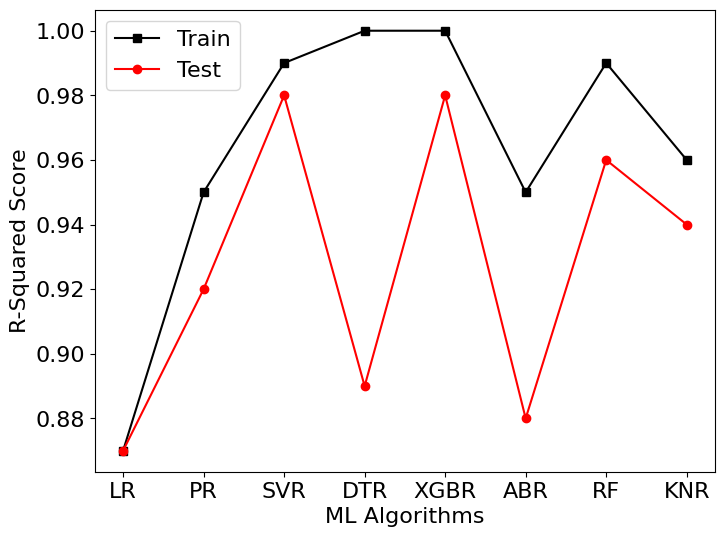

In [ ]:
# Data
ml_algorithms = ['LR', 'PR', 'SVR', 'DTR', 'XGBR', 'ABR', 'RF', 'KNR']

test_r_sq = [0.87, 0.92, 0.98, 0.89, 0.98, 0.88, 0.96, 0.94]
train_r_sq = [0.87, 0.95, 0.99, 1.0, 1.0, 0.95, 0.99, 0.96]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(ml_algorithms, train_r_sq , marker='s', label='Train', color='black')
plt.plot(ml_algorithms, test_r_sq , marker='o', label='Test', color='red')

# Labels and Title
plt.xlabel('ML Algorithms',fontsize=16)
plt.ylabel('R-Squared Score',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Display the plot
plt.show()


#### Conclusion:
From the visual comparison of different models based on these metrics, the following conclusions can be drawn:
1. **XGBoost Regressor (XGBR)** consistently performs the best across most metrics, showing the lowest RMSE and MAE, and the highest R² and A10 scores. This indicates it is highly effective in both training and testing phases, making it the top-performing model.
   
2. **Support Vector Regression (SVR)** follows closely behind XGBoost, especially in terms of A10 and R² scores. It also has relatively low RMSE and MAE, making it a strong contender.

3. **Random Forest Regressor (RF)** performs well in terms of both A10 and R² scores, though its RMSE and MAE are slightly higher than XGBR and SVR, placing it in third.

4. **K-Nearest Neighbors Regressor (KNR)** shows reasonably good performance, particularly with a strong A10 score and moderate RMSE and MAE, putting it in fourth place.

5. **Polynomial Regression (PR)** exhibits moderate performance, performing better than KNR in terms of R² but with higher RMSE and MAE, ranking just below KNR.

6. **Decision Tree Regressor (DTR)**, while having perfect performance on the training set (due to overfitting), performs poorly on the testing set, indicating a lack of generalization.

7. **AdaBoost Regressor (ABR)** has lower performance overall, with higher RMSE and MAE, and lower R² scores, especially on the testing set.

8. **Linear Regression (LR)**, while the simplest model, shows the lowest performance across most metrics, making it the least effective among the models tested.


### Comparison of Actual vs. Predicted Values for the Best Performing Model

In this step, the actual experimental values are compared to the predicted values from the XGBoost Regressor, the best-performing model based on the evaluation metrics. A bar chart is used to visually represent the differences between the actual tensile strength and the predicted values for the test dataset. This comparison helps assess how well the model generalizes on unseen data.



X_train.shape:  (100, 3)
X_test.shape:  (25, 3)
y_train.shape:  (100,)
y_test.shape:  (25,)


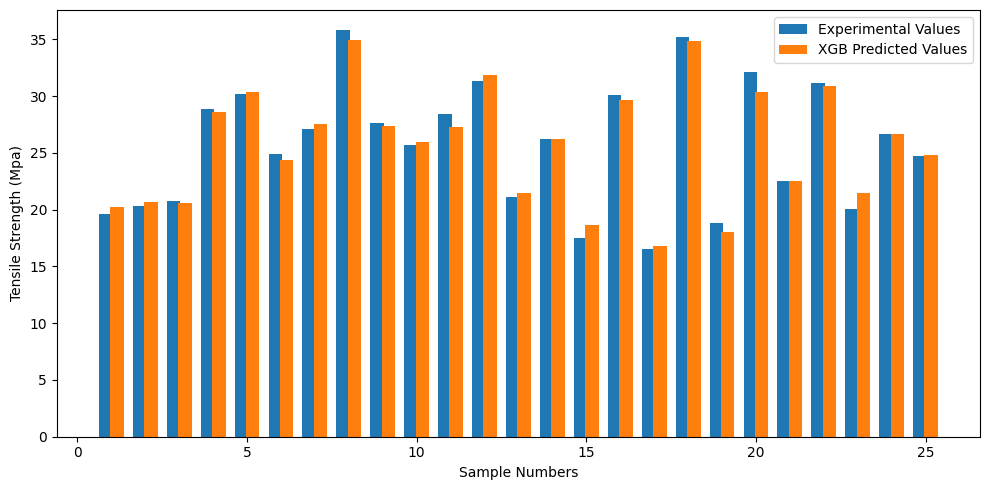

In [ ]:
X_train, X_test, y_train, y_test = data_preprocessing(dataset)
y_test_xgb = xgb.predict(X_test)
x_indices = np.arange(1, len(y_test_xgb) + 1)

plt.figure(figsize=(10, 5))

# Plot the data
width = 0.4  # Width of the bars
gap = 0.1  # Gap between groups of bars
plt.bar(x_indices - (width + gap) / 3, y_test, width, label='Experimental Values')
plt.bar(x_indices + (width + gap) / 3, y_test_xgb, width, label='XGB Predicted Values')

# Labels and Title
plt.xlabel('Sample Numbers')
plt.ylabel('Tensile Strength (Mpa)')
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for x-axis labels
plt.show()

